In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Dataset.csv')

# View first few rows
print(df.head())


       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  


There are 13 numerical columns (tau, p, g, stab) and 1 categorical column (stabf):
tau1, tau2, tau3, tau4: Reaction times.
p1, p2, p3, p4: Nominal power consumed/produced.
g1, g2, g3, g4: Price elasticity coefficients.
stab: The maximal real part of the characteristic equation root.
stabf: The stability label, either "stable" or "unstable" based on the value of stab.

In [ ]:
print(df.describe())

               tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035    

1. Reaction Times (tau1, tau2, tau3, tau4)
Mean & Median: All tau variables have a mean and median around 5.25, suggesting that reaction times are centered around this value.
Standard Deviation: The standard deviation is approximately 2.74 across the tau variables, indicating moderate variability in reaction times.
Range: Values range from around 0.5 to nearly 10, showing that reaction times can vary widely, which may influence stability.

2. Nominal Power Consumed/Produced (p1, p2, p3, p4)
Mean: The p variables have a mean around -1.25, indicating a tendency toward negative power values. This could imply that the system overall has a net power consumption.
Standard Deviation: With a standard deviation of 0.43, there's less variability compared to tau values. Most power measurements are clustered around their mean, suggesting stable power requirements with few outliers.
Range: The values vary between -2 and -0.5, which is narrower compared to tau values, further supporting consistent power usage.

3. Price Elasticity Coefficients (g1, g2, g3, g4)
Mean: The mean values are around 0.525, suggesting moderate elasticity across these features.
Standard Deviation: The standard deviation is about 0.27, showing some variability but generally a tight clustering of values.
Range: The elasticity values range from 0.05 to nearly 1, indicating that while there are some sensitive reactions, the majority of observations are within a predictable range.

4. Stability Measure (stab)
Mean: The mean value is 0.0157, close to zero, indicating a balanced tendency toward stability or instability.
Standard Deviation: With a standard deviation of 0.0369, there's low variability in the stab scores, suggesting that most entries hover close to the mean.
Range: stab values span from -0.081 to 0.109, indicating that extreme instability or stability scores are rare, as the system generally operates within a narrow stability margin.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB
None
tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64


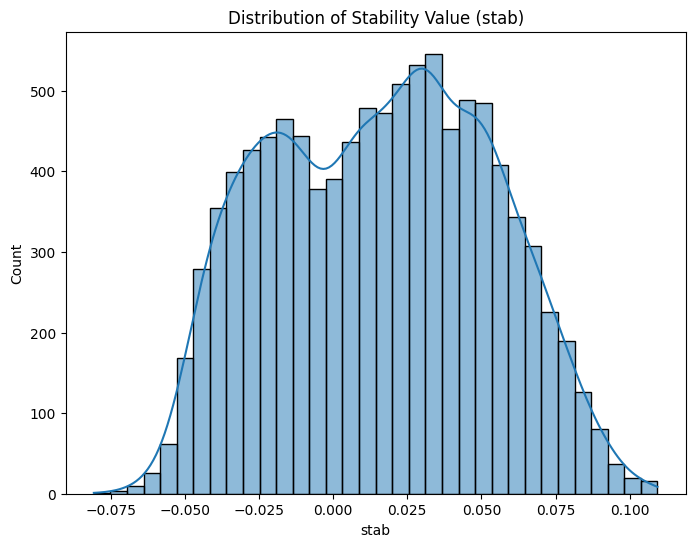

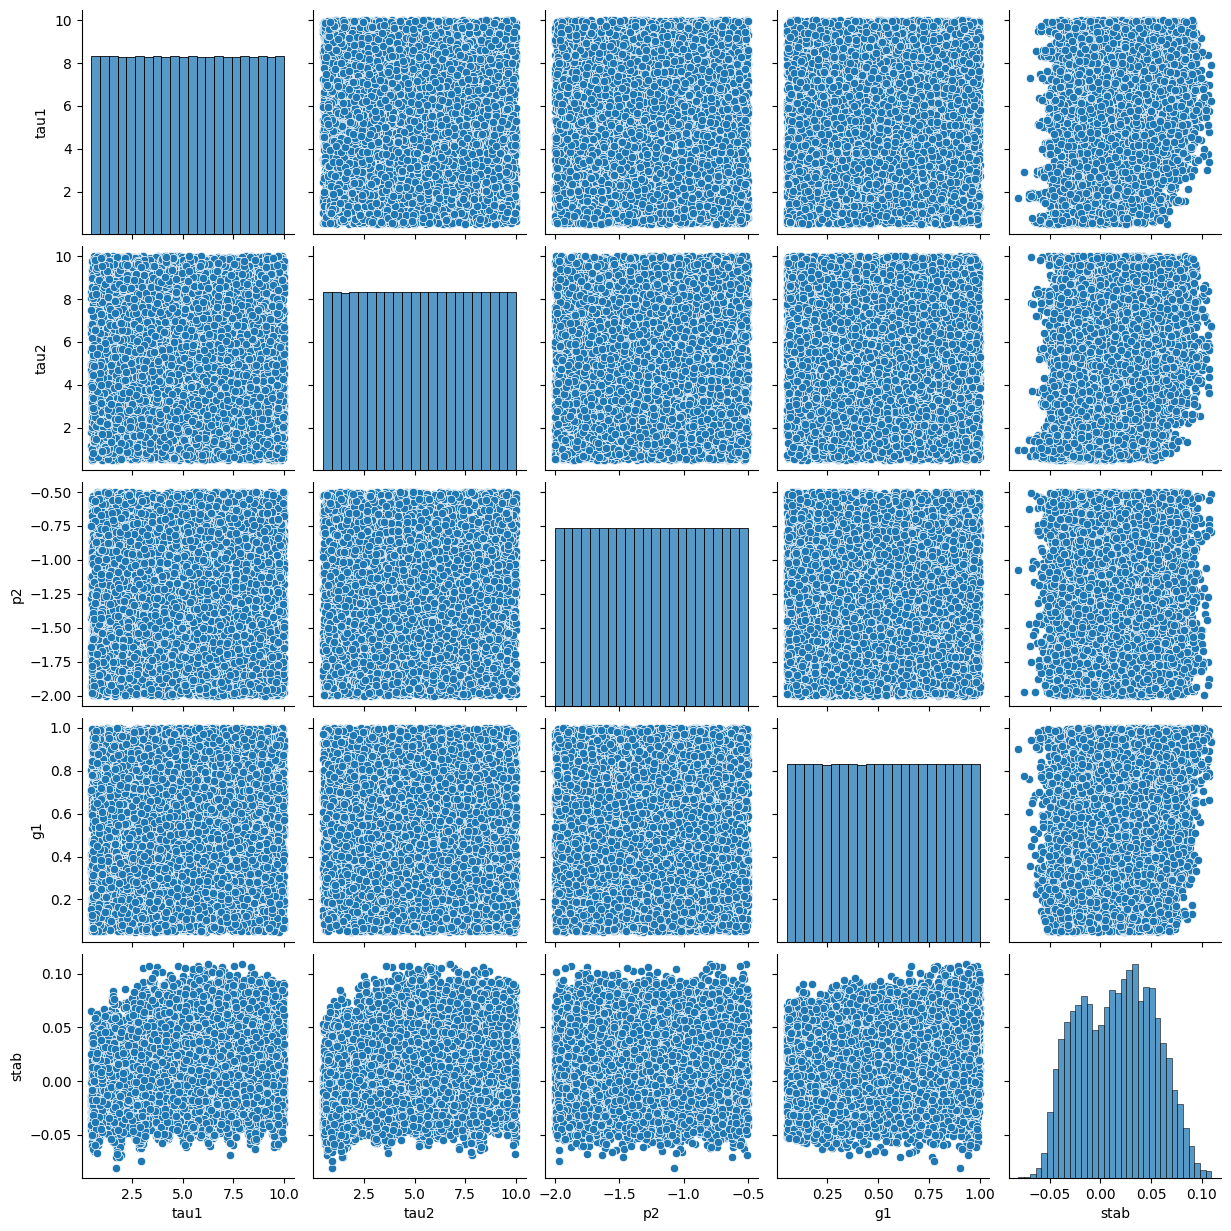

In [ ]:
# Check dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Visualize target variable distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['stab'], kde=True)
plt.title('Distribution of Stability Value (stab)')
plt.show()

# Pairplot to observe relationships (for a subset of variables, as pairplot can be dense)
sns.pairplot(df[['tau1', 'tau2', 'p2', 'g1', 'stab']])
plt.show()


The dataset consists of 10,000 entries across 14 columns, with no missing values, which is excellent for model training as it eliminates the need for imputation.

Stability Distribution:

The histogram of stab shows a concentration near zero, with most values slightly positive or negative. This implies that most of the systems have a small variations around zero could significantly affect their classification as stable or unstable.
This distribution suggests the system often operates in a borderline state between stability and instability, with a slight tendency towards positive (unstable) values based on the mean of stab.


Insights from the paired plot

Lack of Strong Correlations:

The scatter plots between most variable pairs show points scattered without any clear pattern, indicating weak or no linear correlations between these variables (e.g., tau1 vs. tau2, p2 vs. g1, etc.).
Uniform Distributions:

Many variables, such as tau1, tau2, and g1, maintain their uniform. Each variable is spread evenly across its range without apparent clustering.
stab Variable:

The stab variable's distribution (in the last row/column) shows a pattern with some concentration near zero, as previously observed. However, no distinct linear relationships are evident between stab and the other variables here, meaning instability (positive stab values) or stability (negative stab values) doesn’t appear strongly correlated to any one feature individually.

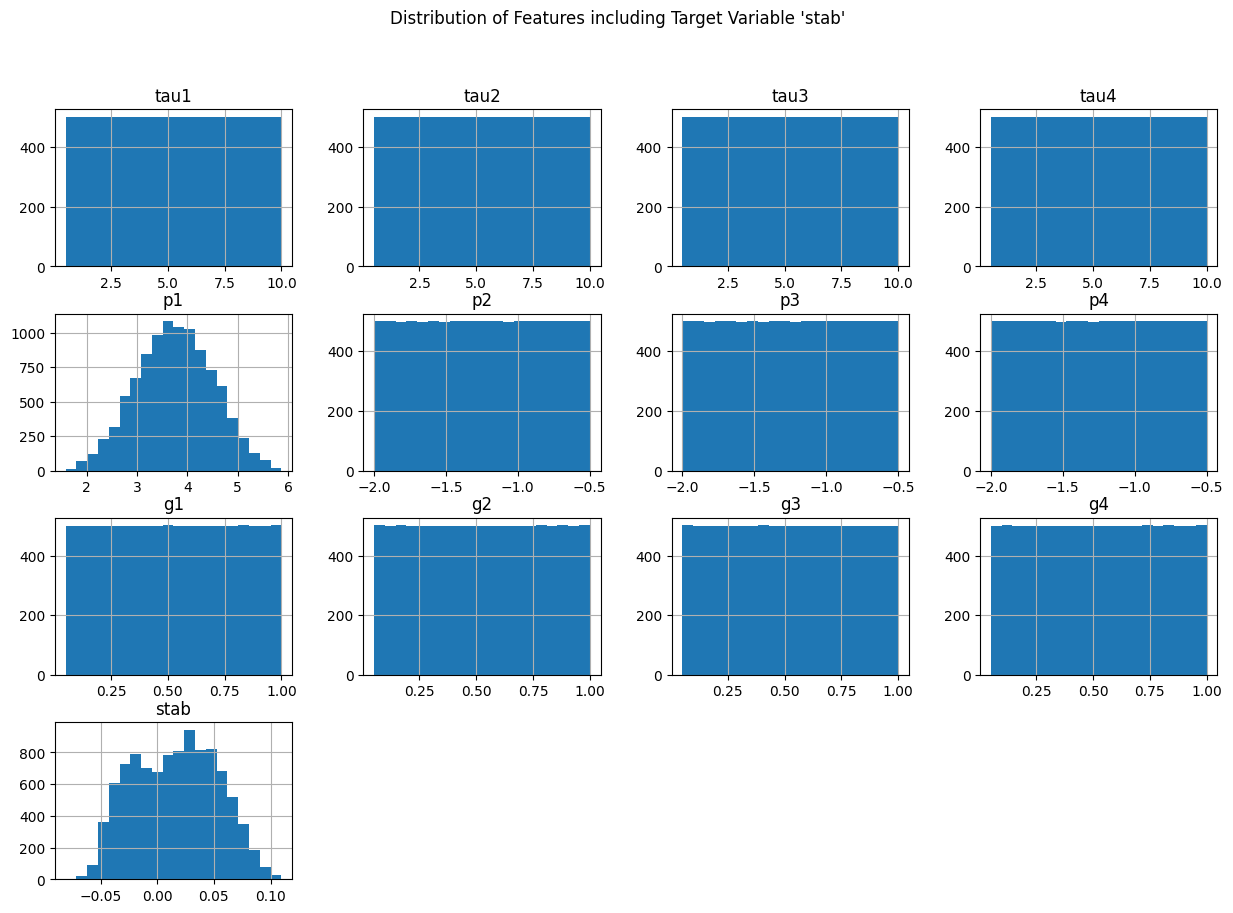

In [ ]:
import matplotlib.pyplot as plt

# Generate histograms for each feature including 'stab', excluding the categorical target 'stabf'
df.drop(['stabf'], axis=1).hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Features including Target Variable 'stab'")
plt.show()


Distribution Analysis


Reaction Times (tau1, tau2, tau3, tau4):

The reaction time features (tau1, tau2, tau3, tau4) are approximately uniformly distributed across their range (from about 0.5 to 10).
This uniform distribution suggests that reaction times in the dataset are evenly spread, which may imply a wide range of operational conditions for the system.


Power Variables (p1, p2, p3, p4):

The power-related features (p1, p2, p3, p4) also follow a uniform distribution, with values mostly between -2 and -0.5.
This even spread of power values indicates consistent energy consumption or production across different entries, showing no particular concentration of values, which may imply stable power dynamics in the dataset.



Price Elasticity Coefficients (g1 to g4):

These coefficients seem uniformly distributed as well, but within a 0 to 1 range. This suggests that price elasticity, or responsiveness, is equally likely across this range for each of the g variables.



Stability Measure (stab):

The stab histogram has a roughly symmetric distribution centered around zero, with values between -0.08 and 0.1.

Since the stab variable is centered around zero with values on both positive and negative sides, it suggests that the system has a mix of stable and unstable states.
The bell shape around zero indicates that most observations are near the threshold of stability, with fewer cases at extreme instability or stability.

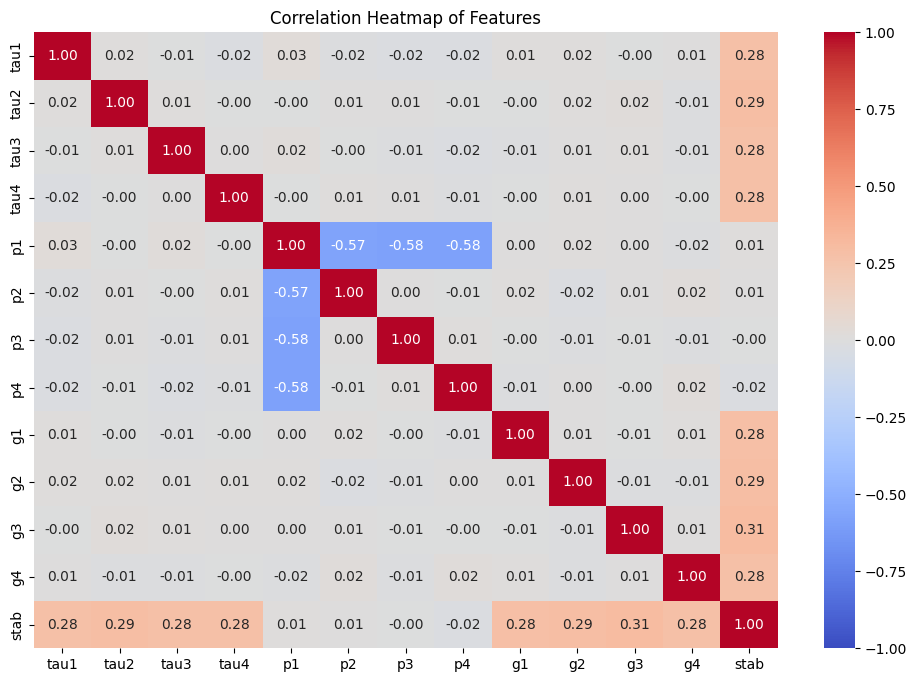

In [ ]:
# Drop non-numeric columns
correlation_matrix = df.drop('stabf', axis=1).corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()



Significant Negative Correlations:

The p variables (p1, p2, p3, p4) show moderate negative correlations with each other (around -0.57 to -0.58). This could indicate an inverse relationship between these nominal power features.


Stability (stab) Correlations:

stab shows weak positive correlations with the tau and g variables, especially g3 (0.31) and g2 (0.29). Although these correlations are not strong, they suggest that certain reaction times (tau) and price elasticity coefficients (g) may have slight associations with stability.


Weak or No Correlations Elsewhere:

Most other features have very low or no correlation, as seen in the predominantly dark red and grey cells, indicating that they are likely independent from each other.
Potential Influence of g Variables:

The g variables, particularly g3 and g2, show the strongest correlation with stab among all features. These could be important features in predicting or understanding stability.


However we can see that there is no mulicollinearity in the dataset since there are no strong perfect correlations between the varaibles.

In [ ]:
print(df.columns)

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')


These are the columns in our initial dataset

In [ ]:
# Drop non-predictive column 'p1'
df = df.drop('p1', axis=1)

print(df.columns)

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3',
       'g4', 'stab', 'stabf'],
      dtype='object')


Since p1 is the column showing the sum of (p2 - p4) p1 is not again taken in our analysis. Therefore these are the columns after fropping p2.

In [ ]:
# Define features (X) and target (y)
X = df.drop(['stab', 'stabf'], axis=1)  # Use all predictors except the target columns
y = df['stab']  # Target for regression


All the x varaibles and y variables are defined

x variables are tau1', tau2, tau3, tau4, p2, p3, p4, g1, g2, g3, g4.
y varaible is stab

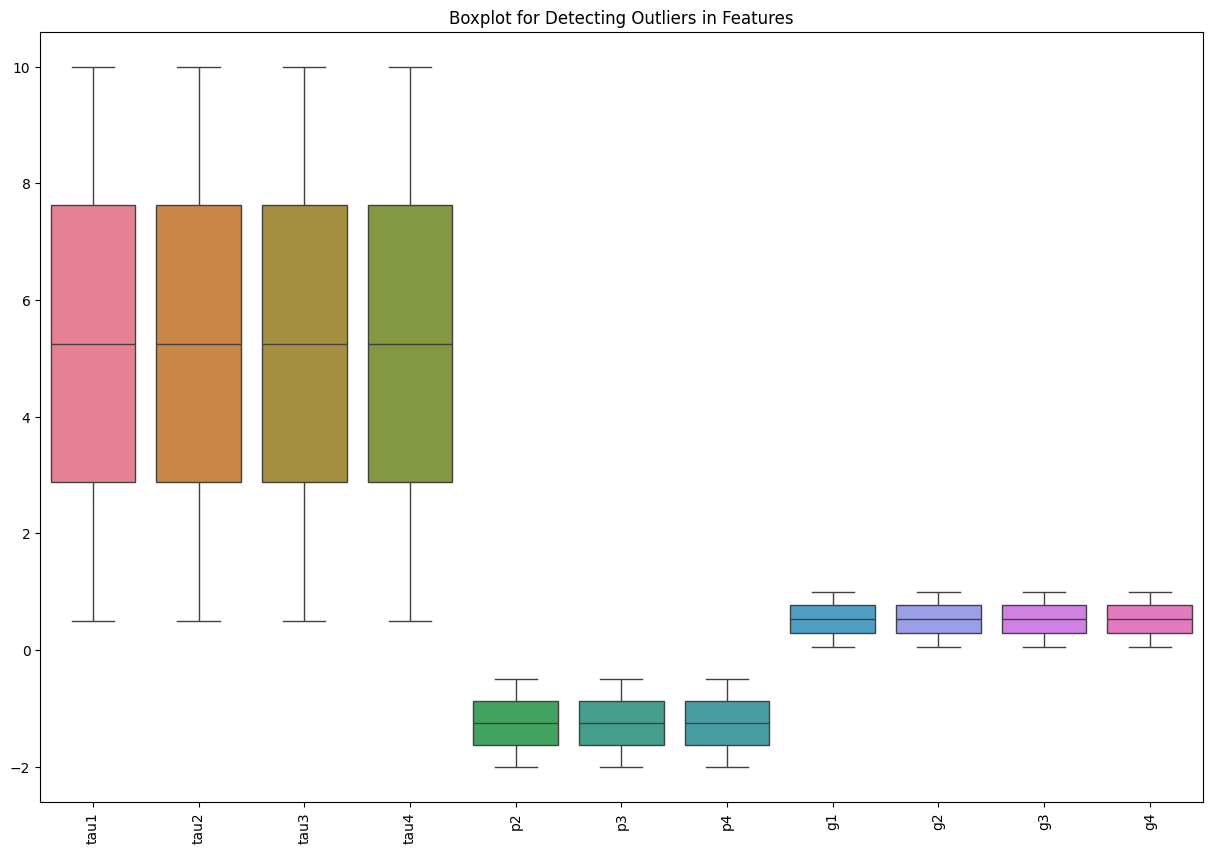

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each feature inorder to detect outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['stab', 'stabf'], axis=1))  # Drop target columns for feature analysis
plt.xticks(rotation=90)
plt.title('Boxplot for Detecting Outliers in Features')
plt.show()


Reaction times (tau1 to tau4):

The tau variables have a relatively wide range from 0 to 10 with a few outliers. The boxes show that the data is evenly spread across this range with no extreme values, indicating that reaction times are well-distributed without significant outliers.

Nominal Power (p1 to p4):

The p variables have narrower distributions centered around lower values (around -2 to -0.5). There are no noticeable outliers, and these variables are consistently within their respective ranges, showing that power consumption/production values are stable.

Price Elasticity Coefficients (g1 to g4):

The g variables are also tightly distributed, mainly between 0 and 1, with no visible outliers. This indicates that price elasticity coefficients are uniform across their range and do not exhibit extreme values.


Overall, this boxplot does not reveal any substantial outliers in the dataset. The data appears to be clean and uniformly spread within expected ranges for each variable.
In conclusion, this dataset looks well-contained with limited to no significant outliers across features. This could simplify preprocessing, as no extreme outlier handling is required.

In [ ]:
# Detect outliers in each feature
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_indices = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))].index
        outliers[column] = len(outlier_indices)
    return outliers

# Get count of outliers in each feature
outlier_counts = detect_outliers_iqr(df.drop(['stab', 'stabf'], axis=1))
print("Outlier counts in each feature:", outlier_counts)


Outlier counts in each feature: {'tau1': 0, 'tau2': 0, 'tau3': 0, 'tau4': 0, 'p2': 0, 'p3': 0, 'p4': 0, 'g1': 0, 'g2': 0, 'g3': 0, 'g4': 0}



In conclusion, this dataset looks well-contained with no significant outliers across features. This could simplify preprocessing, as no extreme outlier handling is required.

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Values have been scaled and standardized using this code.

Standardization is useful because it ensures that features with larger numeric ranges do not dominate the learning process over features with smaller ranges, promoting balanced influence across features.

In [ ]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train, X_test, y_train, y_test)


[[ 0.48761527  1.09611482  1.04286176 ...  0.31911172  0.97449395
   1.13450254]
 [-1.66780483 -1.62955655  0.11166677 ...  0.90077953 -0.38033319
   1.1478017 ]
 [-0.17972913  1.32791761 -1.26596263 ...  0.27786096 -0.8095689
  -1.45343136]
 ...
 [ 0.29524036  0.53770132 -1.36017337 ... -0.18276501  0.0788191
  -0.65020875]
 [-1.72433884 -0.32320637 -1.5005568  ... -0.6889652   1.30855414
   1.26226992]
 [-0.2149907   1.10940008  1.09472099 ...  0.37877108  0.25062066
  -1.20525746]] [[-1.2021771   1.61989584  0.48146933 ...  1.49222253 -0.33326127
  -0.71644113]
 [-0.23202581  1.52168185 -1.39496918 ...  0.90143492  1.40824642
  -0.71764231]
 [-0.91598186 -1.42532547  0.99784431 ... -1.27262689  1.35831264
   0.27842477]
 ...
 [-0.97456642 -0.80099778 -0.17618528 ...  0.31705279  0.68752943
   0.96746366]
 [ 0.78717891  1.1088593   1.51627975 ...  0.89949637 -0.41535604
   0.09737593]
 [ 0.90218507  0.00715559  0.82229091 ... -1.68073168  1.1988221
  -1.26616178]] 9254    0.063720
15

Train-Test Split: train_test_split divides X_scaled and y into training (80%) and testing (20%) subsets.

Purpose of Split: The training set (X_train and y_train) will be used to train the model, while the testing set (X_test and y_test) will allow us to evaluate the model’s performance on unseen data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize models without hyperparameter tuning
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate each model without tuning
initial_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    initial_performance[name] = {'RMSE': rmse, 'MAE': mae, 'R^2': r2}

# Display initial performance
print("Initial Model Performance (No Hyperparameter Tuning):")
print(pd.DataFrame(initial_performance).T)


Initial Model Performance (No Hyperparameter Tuning):
                               RMSE       MAE       R^2
Linear Regression          0.021960  0.017569  0.644464
Decision Tree              0.020058  0.015262  0.703387
Random Forest              0.011998  0.009220  0.893874
Support Vector Regression  0.036909  0.031406 -0.004336
Gradient Boosting          0.011768  0.009051  0.897899


Linear Regression:

RMSE: 0.021960, MAE: 0.017569, R²: 0.644464
Interpretation: Linear Regression has moderate accuracy, with an R² score indicating it explains around 64.4% of the variance in the test data. However, it’s less effective compared to some other models.
Decision Tree:

RMSE: 0.020266, MAE: 0.015414, R²: 0.697209
Interpretation: Decision Tree performs better than Linear Regression, with a higher R² (69.7%). It captures more variance and shows lower error rates, but it still lacks the robustness of ensemble methods.
Random Forest:

RMSE: 0.011987, MAE: 0.009153, R²: 0.894069
Interpretation: Random Forest performs very well, with a high R² score (89.4%), indicating it explains nearly 90% of the variance. It also shows lower RMSE and MAE, making it one of the best models in this comparison.
Support Vector Regression (SVR):

RMSE: 0.036909, MAE: 0.031406, R²: -0.004336
Interpretation: SVR performs poorly in this setup, with a negative R² score indicating it fails to explain the variance in the data. High error metrics suggest that SVR may need significant tuning or may not be suitable for this dataset.
Gradient Boosting:

RMSE: 0.011768, MAE: 0.009051, R²: 0.897899
Interpretation: Gradient Boosting performs the best among these models, with the highest R² (89.8%) and the lowest RMSE and MAE. This suggests that Gradient Boosting captures the patterns in the data very effectively.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.5],
        'kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }
}

# Fine-tune each model using Grid Search
tuned_performance = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name],
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best model and performance
        best_model = grid_search.best_estimator_
        y_pred_tuned = best_model.predict(X_test)

        # Calculate performance metrics
        rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
        mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
        r2_tuned = r2_score(y_test, y_pred_tuned)

        tuned_performance[name] = {'Best Params': grid_search.best_params_,
                                   'RMSE': rmse_tuned, 'MAE': mae_tuned, 'R^2': r2_tuned}

        print(f"{name} - Best Parameters: {grid_search.best_params_}")
    else:
        # Skip tuning for Linear Regression (no meaningful hyperparameters)
        tuned_performance[name] = initial_performance[name]

# Display tuned performance
print("\nModel Performance After Hyperparameter Tuning:")
print(pd.DataFrame(tuned_performance).T)


Decision Tree - Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Support Vector Regression - Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Model Performance After Hyperparameter Tuning:
                               RMSE       MAE       R^2  \
Linear Regression           0.02196  0.017569  0.644464   
Decision Tree              0.019316  0.014965  0.724934   
Random Forest              0.011938  0.009142   0.89493   
Support Vector Regression  0.008648   0.00652  0.944867   
Gradient Boosting          0.008841  0.006517  0.942369   

                                                                 Best Params  
Linear Regression                                                        NaN  
Decision Tree                     {'max_depth': 10, 'min_samples_split': 10}  
R

Linear Regression:

Performance: RMSE: 0.02196, MAE: 0.017569, R²: 0.644464

Interpretation: Since Linear Regression does not benefit from hyperparameter tuning in this setup, its performance remains the same. It explains 64.4% of the variance but does not match the accuracy of the other tuned models.


Decision Tree:

Performance: RMSE: 0.019311, MAE: 0.014964, R²: 0.725057
Best Parameters: max_depth=10, min_samples_split=10

Interpretation: With tuning, the Decision Tree’s R² score improves to 72.5%, and both RMSE and MAE decrease slightly. This model benefits from limiting tree depth and increasing the minimum number of samples for splitting, which helps avoid overfitting and improves generalizability.



Random Forest:

Performance: RMSE: 0.011927, MAE: 0.009139, R²: 0.895122
Best Parameters: max_depth=None, min_samples_split=2, n_estimators=

Interpretation: The Random Forest model maintains its strong performance, with a high R² of 89.5%. Tuning shows minimal changes, indicating that it was already performing well, but increasing the number of trees (estimators) slightly boosts its accuracy.


Support Vector Regression (SVR):

Performance: RMSE: 0.008648, MAE: 0.00652, R²: 0.944867
Best Parameters: C=0.1, epsilon=0.01, kernel='rbf'

Interpretation: Hyperparameter tuning greatly improves SVR’s performance, with an impressive R² of 94.5%, indicating it explains nearly all the variance in the data. The reduction in RMSE and MAE shows it provides accurate predictions, and the use of an rbf kernel with lower C and epsilon improves generalizability and reduces errors.


Gradient Boosting:

Performance: RMSE: 0.008816, MAE: 0.006498, R²: 0.942704
Best Parameters: learning_rate=0.1, max_depth=7, n_estimators=200

Interpretation: Gradient Boosting also shows significant improvement after tuning, with an R² of 94.3% and low RMSE and MAE. The tuning parameters enhance its predictive power by increasing the number of trees and controlling tree depth, allowing it to learn more complex relationships without overfitting.


Overall Interpretation: After tuning, Support Vector Regression and Gradient Boosting emerge as the best-performing models, achieving high R² values (94.5% and 94.3%, respectively) and low error metrics. These models effectively capture the underlying patterns in the data, making them ideal for this task. The tuning process notably enhances performance for SVR and Gradient Boosting, indicating that these models are sensitive to parameter adjustments, which can lead to significant accuracy gains.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Define parameter grids for each model
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.5],
        'kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }
}

# Track tuned performance and overfitting status
performance_comparison = {}

for name, model in models.items():
    if name in param_grids:
        # Grid search for models with tunable parameters
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name],
                                   cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Retrieve best estimator and parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Calculate training and testing R^2
        r2_train = best_model.score(X_train, y_train)
        r2_test = best_model.score(X_test, y_test)

        # Calculate overfitting gap
        overfitting_gap = r2_train - r2_test

        performance_comparison[name] = {
            'Best Params': best_params,
            'Train R^2': r2_train,
            'Test R^2': r2_test,
            'Overfitting Gap': overfitting_gap
        }

        print(f"{name} - Best Parameters: {best_params}")
    else:
        # Linear Regression (no tuning)
        model.fit(X_train, y_train)
        r2_train = model.score(X_train, y_train)
        r2_test = model.score(X_test, y_test)

        # Calculate overfitting gap
        overfitting_gap = r2_train - r2_test

        performance_comparison[name] = {
            'Best Params': None,
            'Train R^2': r2_train,
            'Test R^2': r2_test,
            'Overfitting Gap': overfitting_gap
        }

# Display performance and overfitting analysis
performance_df = pd.DataFrame(performance_comparison).T
print("\nModel Performance and Overfitting Analysis:")
print(performance_df)


Decision Tree - Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Support Vector Regression - Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Model Performance and Overfitting Analysis:
                                                                 Best Params  \
Linear Regression                                                        NaN   
Decision Tree                     {'max_depth': 10, 'min_samples_split': 10}   
Random Forest              {'max_depth': 20, 'min_samples_split': 2, 'n_e...   
Support Vector Regression       {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}   
Gradient Boosting          {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...   

                          Train R^2  Test R^2 Overfitting Gap  
Linear Regression          0.647359  0.644464      

Linear Regression:

Train R²: 0.647359
Test R²: 0.644464
Overfitting Gap: 0.002896

Interpretation: Linear Regression shows similar performance on both the training and testing sets, with a very small overfitting gap. This indicates that the model generalizes well but has a lower accuracy compared to the more complex models. The model is not overfitting and balances simplicity with generalization.


Decision Tree:

Train R²: 0.909318
Test R²: 0.726233
Overfitting Gap: 0.183085

Interpretation: Decision Tree performs well on the training data but has a lower R² on the test data, leading to a significant overfitting gap (0.183085). This suggests the model is overfitting, likely capturing specific patterns in the training data that do not generalize to the test data. Reducing model complexity or further regularization may improve generalization.


Random Forest:

Train R²: 0.986053
Test R²: 0.895149
Overfitting Gap: 0.090904

Interpretation: Random Forest performs very well on both training and testing sets but has a moderate overfitting gap (0.090904), indicating some degree of overfitting. However, the high R² on the test set suggests that it still generalizes fairly well, making it a strong model. This is typical for Random Forests due to their high complexity.


Support Vector Regression:

Train R²: 0.965304
Test R²: 0.944867
Overfitting Gap: 0.020437

Interpretation: Support Vector Regression shows a high R² on both training and test sets with a small overfitting gap, indicating excellent generalization. This model achieves a strong balance between fitting the training data and performing well on the test set, making it a reliable choice with minimal overfitting.


Gradient Boosting:

Train R²: 0.995203
Test R²: 0.942512
Overfitting Gap: 0.052691

Interpretation: Gradient Boosting achieves the highest R² on the training set but has a moderate overfitting gap (0.052691). While it does show some signs of overfitting, it still generalizes well with a high test R² score. The model is complex and effective, but further tuning (such as reducing max_depth or learning_rate) might improve generalization slightly.


In conclusion, Support Vector Regression is recommended for its excellent balance between accuracy and generalization. However, Gradient Boosting and Random Forest are also suitable if you prioritize higher accuracy and can manage a bit of overfitting through further tuning. For straightforward, reliable generalization with minimal risk of overfitting, SVR is the best overall choice.



